In [105]:
!pip install keras -q
!pip install pydot -q
!brew install graphiz -q

==> Searching for similarly named formulae...
This similarly named formula was found:
graphviz
To install it, run:
  brew install graphviz
==> Searching for a previously deleted formula (in the last month)...
Error: No previously deleted formula found.
==> Searching taps on GitHub...
Error: No formulae found in taps.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import datasets, layers, models, utils

In [13]:
!ls ./../data/pickle

df_bin_test.pkl  df_bin_train.pkl df_tri_test.pkl  df_tri_train.pkl


In [2]:
df_bin_train = pd.read_pickle('./../data/pickle/df_bin_train.pkl')
df_bin_test = pd.read_pickle('./../data/pickle/df_bin_test.pkl')
df_tri_train = pd.read_pickle('./../data/pickle/df_tri_train.pkl')
df_tri_test = pd.read_pickle('./../data/pickle/df_tri_test.pkl')

In [282]:
df_bin_train.isna().value_counts()

0      1    
False  False    10243
True   False        1
dtype: int64

In [3]:
df_bin_train.dropna(inplace=True)

In [4]:
df_bin_train.isna().value_counts()

0      1    
False  False    10243
dtype: int64

In [86]:
df_bin_train.iloc[0,0].shape # img vector shape, input shape to CNN

(208, 176)

Classification (0= NoDementia, 1= Dementia): 0


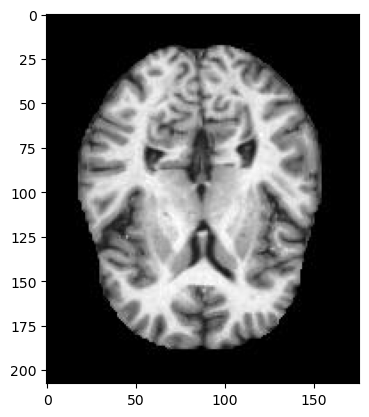

In [285]:
plt.imshow(df_bin_train.iloc[0,0],cmap='gray')
print(f'Classification (0= NoDementia, 1= Dementia): {df_bin_train.iloc[0,1]}')

# Binary Classification CNN

#### A. Build model

In [45]:
bin_model = models.Sequential()
bin_model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(208,176,1)))
bin_model.add(layers.MaxPooling2D((2,2)))
bin_model.add(layers.Conv2D(64, (3,3), activation='relu'))
bin_model.add(layers.MaxPooling2D((2,2)))
bin_model.add(layers.Conv2D(63, (3,3), activation ='relu'))

In [46]:
bin_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 206, 174, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 103, 87, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 101, 85, 64)       18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 50, 42, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 48, 40, 63)        36351     
                                                                 
Total params: 55,167
Trainable params: 55,167
Non-trai

In [47]:
bin_model.add(layers.Flatten())
bin_model.add(layers.Dense(1, activation = 'sigmoid'))

#### B. Compile model

In [48]:
bin_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [290]:
utils.plot_model(bin_model, rankdir="LR", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### C.  Fit model

- Here I changed the elements of the data structure from an array of arrays to a tensor input. First I removed the outer array putting the inner arrays into a list, then converted that list of arrays to a tensor

In [5]:
bin_train_img = df_bin_train[0].values.tolist()

In [6]:
bin_train_img = tf.convert_to_tensor(bin_train_img)

2022-10-20 08:27:58.926237: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [317]:
bin_train_img.shape

TensorShape([10243, 208, 176])

In [7]:
bin_train_label = df_bin_train[1].values

In [8]:
bin_train_label.shape

(10243,)

In [49]:
bin_history = bin_model.fit(
    bin_train_img, bin_train_label, epochs=10, 
    validation_split=0.20
)

Epoch 1/10
257/257 [==============================] - 153s 592ms/step - loss: 2.1109 - accuracy: 0.5633 - val_loss: 0.6549 - val_accuracy: 0.5617
Epoch 2/10
257/257 [==============================] - 158s 616ms/step - loss: 0.6116 - accuracy: 0.6144 - val_loss: 0.6025 - val_accuracy: 0.6262
Epoch 3/10
257/257 [==============================] - 160s 621ms/step - loss: 0.5681 - accuracy: 0.6513 - val_loss: 0.7852 - val_accuracy: 0.6291
Epoch 4/10
257/257 [==============================] - 161s 628ms/step - loss: 0.6149 - accuracy: 0.6178 - val_loss: 0.6254 - val_accuracy: 0.6003
Epoch 5/10
257/257 [==============================] - 159s 620ms/step - loss: 0.5874 - accuracy: 0.6323 - val_loss: 0.5734 - val_accuracy: 0.6462
Epoch 6/10
257/257 [==============================] - 160s 623ms/step - loss: 0.5032 - accuracy: 0.6895 - val_loss: 0.5354 - val_accuracy: 0.6691
Epoch 7/10
257/257 [==============================] - 161s 625ms/step - loss: 0.4670 - accuracy: 0.7093 - val_loss: 0.5235 -

### Model Evaluation

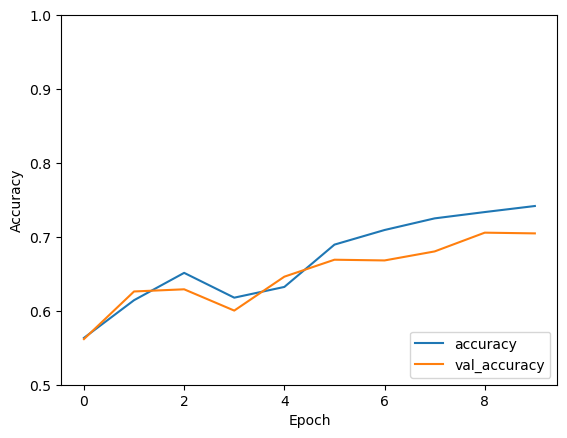

In [50]:
plt.plot(bin_history.history['accuracy'], label='accuracy')
plt.plot(bin_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [17]:
bin_test_img = df_bin_test[0].values.tolist()
bin_test_img = tf.convert_to_tensor(bin_test_img)
bin_test_img.shape

TensorShape([1279, 208, 176])

In [18]:
bin_test_label = df_bin_test[1].values
bin_test_label.shape

(1279,)

In [51]:
test_loss, test_acc = bin_model.evaluate(bin_test_img,  bin_test_label, verbose=2)

40/40 - 5s - loss: 1.0754 - accuracy: 0.6661 - 5s/epoch - 120ms/step


In [54]:
print(test_acc)

0.6661454439163208


#### Summary:

The current model is only 63% accurate. Layers, inputs, and dropouts will be adjusted in the next iteration.
    

## Binary Classification Tuning

#### A. Added Dropout, changed layer inputs

In [10]:
bin_model2 = models.Sequential()

bin_model2.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(208,176,1)))
bin_model2.add(layers.MaxPooling2D((2,2)))

bin_model2.add(layers.Conv2D(64, (3,3), activation='relu'))
bin_model2.add(layers.MaxPooling2D((2,2)))

bin_model2.add(layers.Conv2D(128, (3,3), activation ='relu'))
bin_model2.add(layers.MaxPooling2D((2,2)))

bin_model2.add(layers.Conv2D(128, (3,3), activation ='relu'))
bin_model2.add(layers.MaxPooling2D((2,2)))

bin_model2.add(layers.Dropout(0.5))
bin_model2.add(layers.Flatten())
bin_model2.add(layers.Dense(512, activation = 'relu'))
bin_model2.add(layers.Dense(1, activation = 'sigmoid'))

In [11]:
bin_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 174, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 103, 87, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 101, 85, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 40, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 20, 128)      0

In [324]:
bin_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [326]:
bin2_history = bin_model2.fit(
    bin_train_img, bin_train_label, epochs=20, 
    validation_split=0.20, batch_size=256
)

Epoch 1/20
33/33 [==============================] - 144s 4s/step - loss: 0.6989 - accuracy: 0.5243 - val_loss: 0.6755 - val_accuracy: 0.5442
Epoch 2/20
33/33 [==============================] - 146s 4s/step - loss: 0.6733 - accuracy: 0.5680 - val_loss: 0.6974 - val_accuracy: 0.5149
Epoch 3/20
33/33 [==============================] - 132s 4s/step - loss: 0.6948 - accuracy: 0.5192 - val_loss: 0.6870 - val_accuracy: 0.5456
Epoch 4/20
33/33 [==============================] - 131s 4s/step - loss: 0.6801 - accuracy: 0.5483 - val_loss: 1.0177 - val_accuracy: 0.4963
Epoch 5/20
33/33 [==============================] - 128s 4s/step - loss: 0.7026 - accuracy: 0.5552 - val_loss: 0.7269 - val_accuracy: 0.4983
Epoch 6/20
33/33 [==============================] - 130s 4s/step - loss: 0.6786 - accuracy: 0.5602 - val_loss: 0.6520 - val_accuracy: 0.5896
Epoch 7/20
33/33 [==============================] - 150s 5s/step - loss: 0.6690 - accuracy: 0.5686 - val_loss: 0.6641 - val_accuracy: 0.5769
Epoch 8/20
33

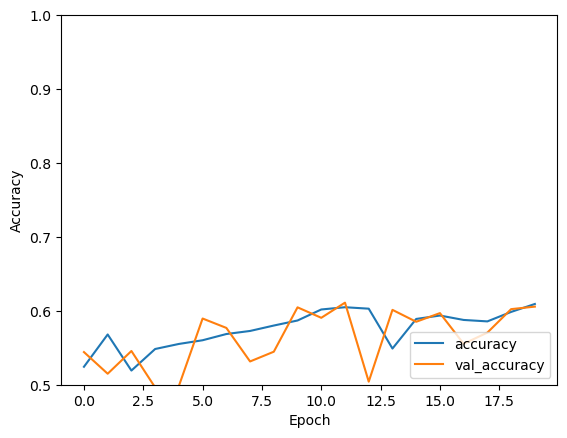

In [327]:
plt.plot(bin2_history.history['accuracy'], label='accuracy')
plt.plot(bin2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#### B. Changed learning rate, increased epochs

In [9]:
opt = tf.keras.optimizers.Adam(learning_rate=3e-4)

In [12]:
bin_model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
bin2_history = bin_model2.fit(
    bin_train_img, bin_train_label, epochs=50, 
    validation_split=0.20, batch_size=256
)

Epoch 1/50
33/33 [==============================] - 131s 4s/step - loss: 6.9821 - accuracy: 0.5146 - val_loss: 0.6808 - val_accuracy: 0.5774
Epoch 2/50
33/33 [==============================] - 127s 4s/step - loss: 0.6774 - accuracy: 0.5613 - val_loss: 0.6744 - val_accuracy: 0.5588
Epoch 3/50
33/33 [==============================] - 129s 4s/step - loss: 0.6776 - accuracy: 0.5580 - val_loss: 0.6701 - val_accuracy: 0.5969
Epoch 4/50
33/33 [==============================] - 125s 4s/step - loss: 0.6614 - accuracy: 0.5875 - val_loss: 0.6440 - val_accuracy: 0.6047
Epoch 5/50
33/33 [==============================] - 133s 4s/step - loss: 0.6492 - accuracy: 0.5948 - val_loss: 0.6981 - val_accuracy: 0.5461
Epoch 6/50
33/33 [==============================] - 132s 4s/step - loss: 0.6536 - accuracy: 0.5886 - val_loss: 0.9482 - val_accuracy: 0.4998
Epoch 7/50
33/33 [==============================] - 132s 4s/step - loss: 0.6733 - accuracy: 0.5768 - val_loss: 0.6721 - val_accuracy: 0.5720
Epoch 8/50
33

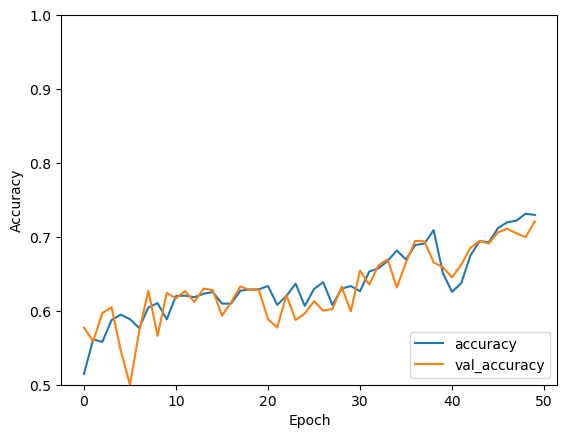

In [14]:
plt.plot(bin2_history.history['accuracy'], label='accuracy')
plt.plot(bin2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [19]:
test_loss, test_acc = bin_model2.evaluate(bin_test_img,  bin_test_label, verbose=2)

40/40 - 6s - loss: 0.6186 - accuracy: 0.7349 - 6s/epoch - 158ms/step


In [20]:
print(test_acc)

0.7349491715431213


In [21]:
print(bin2_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


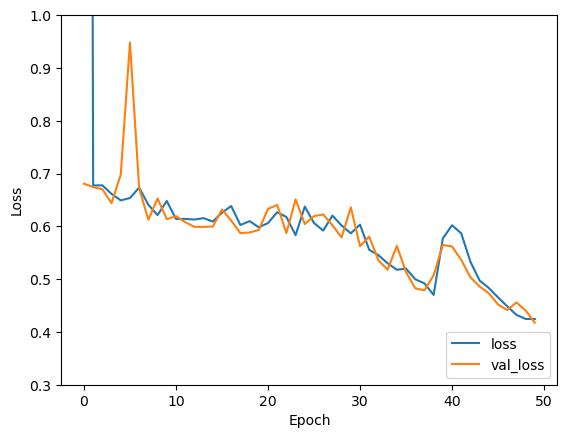

In [23]:
plt.plot(bin2_history.history['loss'], label='loss')
plt.plot(bin2_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

### Summary: 

The model should be trained for futher epochs since the model is performing similarly well on both the training and validation set, the accuracy hasn't plateaued, the loss has yet to consistently depart. To put this simply, the model hasn't overfit and the accuracy is still increasing.  

#### C. Increased epochs 50 - 100

In [30]:
bin_model3 = models.Sequential()

bin_model3.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(208,176,1)))
bin_model3.add(layers.MaxPooling2D((2,2)))

bin_model3.add(layers.Conv2D(64, (3,3), activation='relu'))
bin_model3.add(layers.MaxPooling2D((2,2)))

bin_model3.add(layers.Conv2D(128, (3,3), activation ='relu'))
bin_model3.add(layers.MaxPooling2D((2,2)))

bin_model3.add(layers.Conv2D(128, (3,3), activation ='relu'))
bin_model3.add(layers.MaxPooling2D((2,2)))

bin_model3.add(layers.Dropout(0.5))
bin_model3.add(layers.Flatten())
bin_model3.add(layers.Dense(512, activation = 'relu'))
bin_model3.add(layers.Dense(1, activation = 'sigmoid'))

In [31]:
bin_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 206, 174, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 103, 87, 32)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 101, 85, 64)       18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 40, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 20, 128)     

In [32]:
opt = tf.keras.optimizers.Adam(learning_rate=3e-4)

In [33]:
bin_model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
bin3_history = bin_model3.fit(
    bin_train_img, bin_train_label, epochs=100, 
    validation_split=0.20, batch_size=256
)

Epoch 1/100
33/33 [==============================] - 127s 4s/step - loss: 5.4715 - accuracy: 0.5066 - val_loss: 0.6918 - val_accuracy: 0.5530
Epoch 2/100
33/33 [==============================] - 131s 4s/step - loss: 0.6786 - accuracy: 0.5495 - val_loss: 0.7147 - val_accuracy: 0.5237
Epoch 3/100
33/33 [==============================] - 124s 4s/step - loss: 0.6885 - accuracy: 0.5481 - val_loss: 0.6676 - val_accuracy: 0.5861
Epoch 4/100
33/33 [==============================] - 125s 4s/step - loss: 0.6772 - accuracy: 0.5627 - val_loss: 0.6583 - val_accuracy: 0.5705
Epoch 5/100
33/33 [==============================] - 133s 4s/step - loss: 0.6682 - accuracy: 0.5729 - val_loss: 0.6516 - val_accuracy: 0.5944
Epoch 6/100
33/33 [==============================] - 134s 4s/step - loss: 0.6465 - accuracy: 0.6008 - val_loss: 0.6479 - val_accuracy: 0.5686
Epoch 7/100
33/33 [==============================] - 131s 4s/step - loss: 0.6353 - accuracy: 0.6024 - val_loss: 0.6259 - val_accuracy: 0.6013
Epoch 

33/33 [==============================] - 127s 4s/step - loss: 0.3779 - accuracy: 0.7414 - val_loss: 0.3785 - val_accuracy: 0.7457
Epoch 59/100
33/33 [==============================] - 123s 4s/step - loss: 0.3728 - accuracy: 0.7455 - val_loss: 0.3793 - val_accuracy: 0.7394
Epoch 60/100
33/33 [==============================] - 127s 4s/step - loss: 0.3713 - accuracy: 0.7393 - val_loss: 0.3862 - val_accuracy: 0.7306
Epoch 61/100
33/33 [==============================] - 124s 4s/step - loss: 0.4468 - accuracy: 0.7189 - val_loss: 0.5999 - val_accuracy: 0.6476
Epoch 62/100
33/33 [==============================] - 125s 4s/step - loss: 0.6479 - accuracy: 0.5959 - val_loss: 0.6459 - val_accuracy: 0.5715
Epoch 63/100
33/33 [==============================] - 126s 4s/step - loss: 0.5667 - accuracy: 0.6572 - val_loss: 0.5149 - val_accuracy: 0.6779
Epoch 64/100
33/33 [==============================] - 129s 4s/step - loss: 0.5558 - accuracy: 0.6682 - val_loss: 0.5021 - val_accuracy: 0.6916
Epoch 65/100

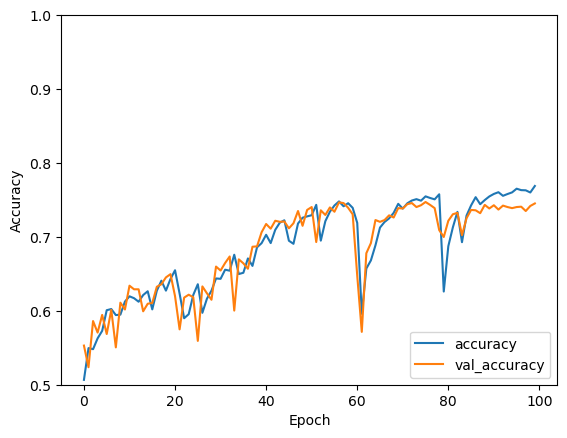

In [35]:
plt.plot(bin3_history.history['accuracy'], label='accuracy')
plt.plot(bin3_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

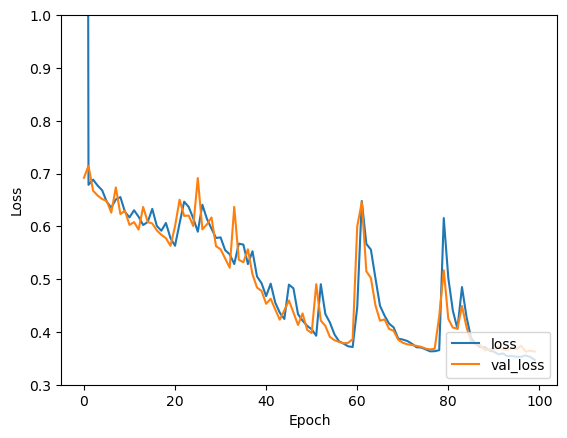

In [36]:
plt.plot(bin3_history.history['loss'], label='loss')
plt.plot(bin3_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

In [37]:
test_loss, test_acc = bin_model3.evaluate(bin_test_img,  bin_test_label, verbose=2)

40/40 - 6s - loss: 0.6340 - accuracy: 0.7873 - 6s/epoch - 141ms/step


In [38]:
print(test_acc)

0.7873338460922241


# ROC-AUC For Final Model

#### 1. Calculate model ROCs

In [60]:
from sklearn.metrics import roc_curve

y_pred_keras1 = bin_model.predict(bin_test_img).ravel()
fpr_keras1, tpr_keras1, thresholds_keras1 = roc_curve(bin_test_label, y_pred_keras1)

y_pred_keras2 = bin_model2.predict(bin_test_img).ravel()
fpr_keras2, tpr_keras2, thresholds_keras2 = roc_curve(bin_test_label, y_pred_keras2)

y_pred_keras3 = bin_model3.predict(bin_test_img).ravel()
fpr_keras3, tpr_keras3, thresholds_keras3 = roc_curve(bin_test_label, y_pred_keras3)

40/40 [==============================] - 7s 165ms/step


#### 2. Calculate model AUCs

In [61]:
from sklearn.metrics import auc
auc_keras1 = auc(fpr_keras1, tpr_keras1)
auc_keras2 = auc(fpr_keras2, tpr_keras2)
auc_keras3 = auc(fpr_keras3, tpr_keras3)

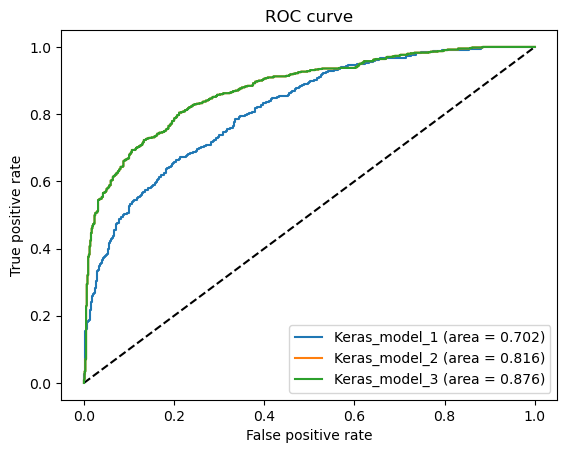

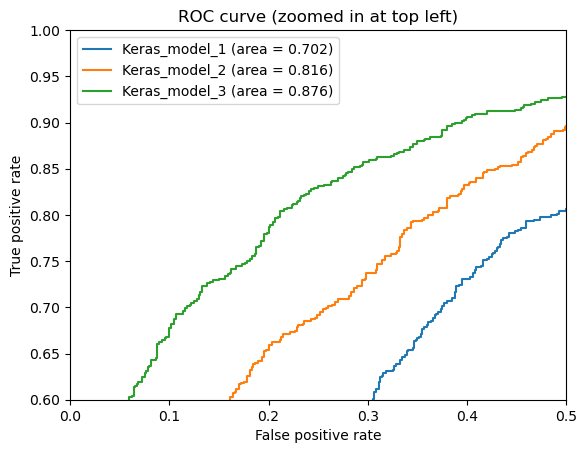

In [70]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras2, tpr_keras2, label='Keras_model_1 (area = {:.3f})'.format(auc_keras1))
plt.plot(fpr_keras3, tpr_keras3, label='Keras_model_2 (area = {:.3f})'.format(auc_keras2))
plt.plot(fpr_keras3, tpr_keras3, label='Keras_model_3 (area = {:.3f})'.format(auc_keras3))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.5)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras1, tpr_keras1, label='Keras_model_1 (area = {:.3f})'.format(auc_keras1))
plt.plot(fpr_keras2, tpr_keras2, label='Keras_model_2 (area = {:.3f})'.format(auc_keras2))
plt.plot(fpr_keras3, tpr_keras3, label='Keras_model_3 (area = {:.3f})'.format(auc_keras3))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# Summary of Findings

Each model became progressively better with each adjustment, but much is to be desired.

The following adjustments were made between models 1 and 2:
- Layers from (32, 64, 63) to (32, 64, 128, 128)
- Dropout of 0.5 after the final convolutional layer
- Created a batch size of 256
- Learning rate from .001 (standard) to .0003
- Epochs from 10 to 50

The following adjustments were made between models 2 and 3:
- Epochs from 50 to 100
> the reasons only Epochs were adjusted is that the model seemed to be performing considerably better and didn't overfit. Interestingly, the model performed better on the test set than on the training and validation sets. Perhaps this is the result of image augmentation.

#### Conclusion: 

After the final adjustments, accuracy went from 60, to 73, to 78 and AUC went from 70, to 81.6, to 87.6 between the three models. Conceivably, based on the increase in performance and the apparent lack of overfitting, further Epochs could be introduced. However, the additional 50 epochs only introduced 5 points in both accuracy and AUC. And, while further tests would be required, overfitting might be indicated around Epoch 90 for the third model as validation loss seems to begin separating from and exceeding training loss and validation accuracy seems to separate and subceeds training accuracy. 
<br>
<br>
For further tests, I would implement Keras Tuner to discern the optimal architecture for each layer. Hereafter, I transition to HuggingFace pretrained models to identify ease of use and increased performance in comparison to the above models. 

### Save Models:

In [72]:
!ls ./..

README.md data      notebooks


In [73]:
!mkdir ./../cnn_models

In [74]:
!ls ./..

README.md  cnn_models data       notebooks


In [75]:
# Checks first to see if file exists already.
# If not, the model is saved to disk.

import os.path
if os.path.isfile('./../cnn_models/cnn_bin_model1.h5') is False:
    bin_model.save('./../cnn_models/cnn_bin_model1.h5')

In [76]:
if os.path.isfile('./../cnn_models/cnn_bin_model2.h5') is False:
    bin_model2.save('./../cnn_models/cnn_bin_model2.h5')

In [77]:
if os.path.isfile('./../cnn_models/cnn_bin_model3.h5') is False:
    bin_model3.save('./../cnn_models/cnn_bin_model3.h5')

In [78]:
!ls ./../cnn_models/

cnn_bin_model1.h5 cnn_bin_model2.h5 cnn_bin_model3.h5


#### Ensure Models are Saved

In [79]:
from tensorflow.keras.models import load_model
test_model = load_model('./../cnn_models/cnn_bin_model3.h5')

In [80]:
test_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 206, 174, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 103, 87, 32)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 101, 85, 64)       18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 40, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 20, 128)     

In [82]:
# test_model.get_weights()

In [83]:
test_model.optimizer